# **ch.07 딥러닝을 시작합니다**  
## 07-2 심층 신경망  
### 풀어야 할 문제:  
> ### 앞선 neural network model의 performance를 향상 시켜라


### *2개의 층*  
keras API를 사용하여 Fsshion MNIST 불러오기

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

image의 pixel value를 normalization,  
28x28 &rarr; 784로 reshape,  
train set과 validation set 나누기

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled = train_input/255.0
test_scaled = test_input/255.0

train_scaled = train_scaled.reshape(-1, 28*28)
test_scaled = test_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

neural network model에 2개의 layer 추가하기  
앞서 만든 neural network model의 input layer와 output layer 사이에 dense layer(hidden layer)를 추가  


hidden layer에는 activation function을 사용하는데, output layer에 사용하는 activation function이 sigmoid와 softmax로 제한적이지만, hidden layer에 적용하는 activation function은 비교적 자유롭게 설정


hidden layer에 activation fuction을 적용하는 이유  
hidden layer에서 activation function을 사용하지 않는다면, 단순 선형 계산만 하게 되어 layer의 의미가 없어짐  
$\therefore$ neural network에 non-linearity를 부여하기 위해 적용


hidden layer에 사용하는 대표적인 actication function 중 하나는 sigmoid function  
&rarr; sigmoid function은 nueron의 output을 0~1 사이의 value로 압축


sigmoid function을 사용한 hidden layer와 softmax function을 사용한 output layer 만들기

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

`dense1` 이 hidden layer이며, 100개의 neuron을 가진 dense layer  
hidden layer의 neuron 개수를 정하는 데는 기준이 없음  
&rarr; 이를 판단하기 위해서는 경험이 필요함


다만, 한 가지 제약이 있다면 적어도 output layer의 neuron보다는 많아야 한다는 것  
$\because$ 10개 class에 대한 probability를 predict해야 하는데, 이전 hidden layer의 neuron이 10개보다 적다면 부족한 information이 전달될 것


`dense2` 는 output layer  
10개의 class를 classify하므로 10개의 neuron을 두었고, activation function으로 softmax를 지정


### *심층 신경망 만들기*  
앞서 만든 `dense1` 과 `dense2` object를 `Sequential` class에 추가하여 deep neural network 만들기

In [ ]:
model = keras.Sequential([dense1, dense2])

`Sequential` class object를 만들 때 여러 개의 layer를 추가하려면 위와 같이 layer object를 리스트로 만들어 전달  
주의할 점은 output layer는 가장 마지막에 두어야 한다는 것


neural network의 강력한 performance는 이렇게 layer를 추가하여 input data에 대해 연속적인 learning을 진행하는 능력에서 나옴


keras는 model의 `summary()`  method를 call하면 layer에 대한 information을 얻을 수 있음

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


model의 이름, layer가 `Sequential` class에 전달한 순서대로 나열됨  
layer마다 layer 이름, class, output의 shape, parameter 개수가 출력됨


output shape이 (None, 100)임  
첫 번째 dimension은 sample의 개수를 나타내는데, sample 개수가 아직 정의되지 않았기에 None  
`fit()` method에 train data를 입력하면 mini-batch로 gradient descent를 수행하기에 sample 개수가 정의되지 않은 것  
keras의 mini-batch size는 32  
이 값은 `fit()` method에서 `batch_size` parameter로 바꿀 수 있음  
두 번째 dimesion은 neuron 수


### *층을 추가하는 다른 방법*  
`Sequential` class에 layer를 추가하는 다른 방법  
앞서 만든 `dense1`과 `dense2`는 따로 저장하여 쓸 일이 없기 때문에 `Sequential` class의 생성자 안에서 바로 `Dense` class object를 만드는 경우가 많음

In [ ]:
model = keras.Sequential([keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hiddem'), keras.layers.Dense(10, activation='softmax', name='ouput')], name='Fashion MNIST model')

이렇게 작업하면 추가되는 layer를 한눈에 알아보기 쉽다는 장점이 있음  
이전과 달리 `Sequential` class의 `name` parameter로 model의 이름을 지정하였고, dense layer의 `name` parameter로 각 layer의 이름을 지정했음  


`summary()` method 확인

In [ ]:
model.summary()

Model: "Fashion MNIST model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddem (Dense)              (None, 100)               78500     
                                                                 
 ouput (Dense)               (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


바뀐 것은 model의 이름과 layer의 이름 뿐  
여러 model과 많은 layer를 사용할 때 `name` parameter를 사용하면 구분하기 좋음


이 방법은 편리하지만 아주 많은 layer를 추가하려면 `Sequential` class의 생성자가 매우 길어지고 또 조건에 따라 layer를 추가할 수도 없음


`Sequential` class에서 층을 추가할 때 가장 널리 사용하는 방법은 `add()` method임  
이 방법은 `Sequential` class object를 만들고 이 object의 `add()` method를 call하여 layer를 추가함

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

summary 확인

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


train model  
`compile()` method 설정,  
epoch 5번 설정

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5713 - accuracy: 0.8033
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4114 - accuracy: 0.8513
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3766 - accuracy: 0.8639
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3551 - accuracy: 0.8720
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3354 - accuracy: 0.8770


train set에 대한 performance를 보면 추가된 layer가 performance를 향상시켰음을 알 수 있음


### *렐루 함수*  
초창기 artificial neural network의 hidden layer에 많이 사용된 activation function은 sigmoid function  
그러나 sigmoid function은 양 극단으로 갈수록 graph가 누워있기에 올바른 output을 만드는 데 신속하게 대응하지 못함  
특히 layer가 많은 deep neural network일수록 효과가 누적되어 learning을 더욱 어렵게 함


이러한 sigmoid function의 문제를 해결하기 위해 제안된 function이 ReLU function  
ReLU는 input이 positive일 때는 activation function이 없는 것처럼 input을 통과시키고, negative일 때는 0을 내보냄


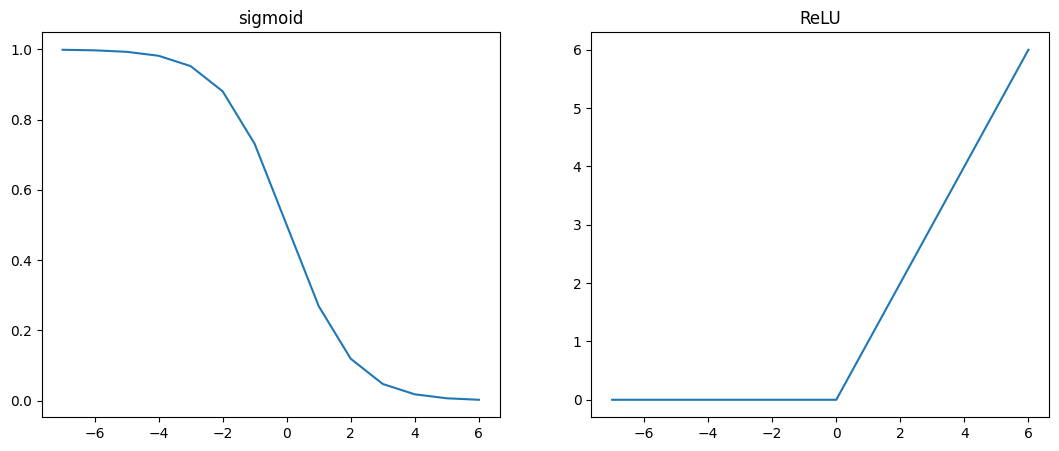

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sx = list(range(-7, 7))
sy = []
for x in sx:
  sy.append(1/(1+np.exp(x)))

rx = list(range(-7, 7))
ry = []
for x in rx:
  if x<=0:
    ry.append(0)
  else:
    ry.append(x)

fig, axs = plt.subplots(1, 2, figsize=(13,5))
axs[0].plot(sx, sy)
axs[0].set_title('sigmoid')
axs[1].plot(rx, ry)
axs[1].set_title('ReLU')
plt.show()

ReLU는 특히 image processing에서 좋은 performance를 낸다고 알려져 있음


지금까지 Fashion MNIST data를 다룰 때, 각 sample이 28x28의 image이므로 numpy array의 `reshape()` method를 사용해서 직접 1 dimension으로 펼쳤음(평탄화)  
keras는 평탄화를 위한 Flatten layer를 제공함


`Flatten` class는 batch dimension을 제외하고 나머지 input dimension을 모두 1열로 펼치는 평탄화 역할만 수행  
input에 곱해지는 weights나 intercepts가 없음  
$\therefore$ neural network의 performance에 기여하는 바는 없음  
그러나 `Flatten` class를 layer처럼  input layer와 hidden layer 사이에 추가하기 때문에 layer라고 부름


flatten layer 추가하기,  
ReLU를 hidden layer의 activation function으로 사용

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

첫 번째 dense layer에 있던 `input_shape` parameter를 flatten layer로 옮겼음


layer를 3개 추가했지만, 이를 3층 neural network라고 하지는 않음  
flatten layer는 learning을 진행하지 않음


summary 확인

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


flatten layer에 포함된 model parameter는 없음  
flatten layer를 추가하면 input layer의 dimension을 짐작할 수 있음


input data에 대한 preprocessing 과정을 가능한한 model에 포함시키는 것이 keras API의 철학


data를 다시 준비하기  
(`reshape()` method 사용하지 않음)

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

compile model,  
train model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5335 - accuracy: 0.8123
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3934 - accuracy: 0.8593
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3544 - accuracy: 0.8715
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3317 - accuracy: 0.8811
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3162 - accuracy: 0.8869


sigmoid function을 사용했을 때보다 조금 performance가 향상되었음  
&rarr; ReLU function의 효과를 보았음  


validation set에서의 score 확인

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3685 - accuracy: 0.8775


[0.36852535605430603, 0.8774999976158142]

hidden layer를 추가하지 않았을 때보다 performance가 향상됨


### *옵티마이저*  
neural network에는 hyperparameter가 많음  
ex) hidden layer의 수, neuron 개수, activation function, layer의 종류, batch size, epoch 수 등


`compile()` method에서는 gradient descent algorithm을 선택할 수 있는데, 지금까지는 기본 algorithm인 RMSprop을 사용했었음  
keras는 다양한 algorithm을 제공하고, 이를 optimizer라고 함  
다른 optimizer들을 test해보지 않을 이유가 없으므로 optimizer 또한 hyperparameter  
optimizer의 learning rate도 hyperparameter


가장 기본적인 optimizer인 stochastic gradient descent를 사용하여 test model


`compile()` method의 `optimizer` parameter로 optimizer 지정

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

optimizer는 `tensorflow.keras.optimizers` package 아래에 class로 구현되어 있음  
`optimizer` parameter에 `'sgd'` 를 지정한 것은 optimizer class의 기본 설정 parameter로 생성한 object와 동일

In [ ]:
sgd = keras.optimizers.SGD()

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

위 code는 앞서 `optimizer` parameter를 `'sgd'` 로 지정한 code와 동일한 code


learning rate를 변경하고자 한다면 `learning_rate` parameter에 value를 지정해서 사용

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

기본 gradient descent optimizers는 모두 `SGD` class에서 제공  
`SGD` class의  `momentum` parameter의 기본 value는 0인데, 이를 0보다 큰 value로 지정하면 momentum optimization을 사용   
`SGD` class의 `nestrov` parameter를 기본 value `False` 에서 `True`로 바꾸면 nestrov momentum optimization을 사용


nestrov momentum optimization은 momentum optimization을 2번 반복하여 구현  
&rarr; 대부분의 경우 nestrov momentum optimization이 기본 sgd보다 더 나은 performance를 보여줌


model이 최적에 가까이 갈수록 learning rate를 낮출 수 있음  
&rarr; 안정적으로 최적에 수렴할 가능성이 높음  
이러한 learning rate를 adaptive learning rate라고 함  
이러한 adaptive learning rate를 지원하는 optimizer들은 learning rate를 tuning하는 수고를 덜어줌


adaptive learning rate를 사용하는 대표적인 optimizer는 Adagrad와 RMSprop, Adam  
각각 `compile()` method의 `optimzer` parameter에 `'adagrad'`, `'rmsprop'`, `'adam'`으로 지정할 수 있음


momentum optimization과 RMSprop의 장점을 접목한 것이 Adam  
Adam은 RMSprop과 함께 맨처음 시도해 볼 수 있는 좋은 algorithm


Adam optimizer를 사용하여 train model
+ generate model
















In [49]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

+ compile model

In [50]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

+ train model

In [52]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3944 - accuracy: 0.8589
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3548 - accuracy: 0.8718
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3267 - accuracy: 0.8811
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3084 - accuracy: 0.8870
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2927 - accuracy: 0.8910


RMSprop을 사용했을 때와 거의 같은 performance를 보여줌


validaion set에서의 score 확인

In [53]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3381 - accuracy: 0.8767


[0.3380846381187439, 0.8766666650772095]